In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from comp_phy import everythin as ev

# Question 1

In [2]:
am = [572,16381]

In [3]:
def rand_2dwalk(steps):
    n = steps
    x = np.zeros(n)
    y = np.zeros(n)

    # filling the coordinates with random variables
    for i in range(1, n):
        val = np.abs(ev.mlcg(am))
        if val < 0.25:
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1]
        elif val < 0.5:
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1]
        elif val < 0.75:
            x[i] = x[i - 1]
            y[i] = y[i - 1] + 1
        else:
            x[i] = x[i - 1]
            y[i] = y[i - 1] - 1
    
    d = np.power(x[n-1]**2 + y[n-1]**2,0.5)
    
    return x,y,d

 

In [4]:
rw200 = rand_2dwalk(200)

Text(0.5, 1.0, 'Random Walk n = 200 steps')

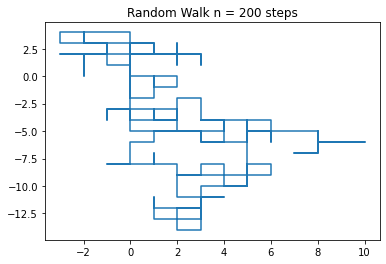

In [5]:
plt.plot(rw200[0],rw200[1])
plt.title("Random Walk n = 200 steps")

In [6]:
#R_rms over 500 walks of N=200 steps

walks = 500
d = np.zeros(walks)
sm = 0
for i in range(walks):
    d[i] = rand_2dwalk(200)[2]
    sm += d[i]**2

R_rms = np.power(sm/walks,0.5)

print(f"Difference is {R_rms - 200**0.5} hence R_rms ~ N^1/2")


#R_rms = 13.887836404566407
#Difference is -0.2542992191645439 hence R_rms ~ N^1/2

Difference is -0.31404826502511973 hence R_rms ~ N^1/2


In [7]:
R_rms

13.828087358705831

# Question 2

In [8]:
with open('esem4fit.txt') as fin, open('fit.txt', 'w') as fout:
    for line in fin:
        fout.write(line.replace('\t', ','))

In [9]:
read_file = pd.read_csv (r'D:\P452-Comp Phy\End sem work\fit.txt')
read_file.to_csv (r'D:\P452-Comp Phy\End sem work\fit.csv', index=None)

In [11]:
df = pd.read_csv(r'D:\P452-Comp Phy\End sem work\fit.csv',names=["x","y"])
df.head()
print(df)

       x         y
0  -1.00  0.151250
1  -0.92  0.083828
2  -0.84  0.062890
3  -0.76  0.026487
4  -0.68  0.021388
5  -0.60  0.012808
6  -0.52  0.018010
7  -0.44  0.060025
8  -0.36  0.078500
9  -0.28  0.106431
10 -0.20  0.099390
11 -0.12  0.115650
12 -0.04  0.133770
13  0.04  0.101914
14  0.12  0.097012
15  0.20  0.105238
16  0.28  0.095889
17  0.36  0.051636
18  0.44  0.048207
19  0.52  0.018802
20  0.60  0.020749
21  0.68  0.027548
22  0.76  0.031700
23  0.84  0.069883
24  0.92  0.112413
25  1.00  0.172327


In [12]:
x = df['x'].to_numpy()
y = df['y'].to_numpy()
print(x,y)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ] [0.15125  0.083828 0.06289  0.026487 0.021388 0.012808 0.01801  0.060025
 0.0785   0.106431 0.09939  0.11565  0.13377  0.101914 0.097012 0.105238
 0.095889 0.051636 0.048207 0.018802 0.020749 0.027548 0.0317   0.069883
 0.112413 0.172327]


In [13]:
def legendre(x,n):
    P = np.array([1,x,(3*x**2 -1)/2,(5*x**3 - 3*x)/2,(35*x**4 - 30*x**2 +3)/8,(63*x**5 - 70*x**3 + 15*x)/8,(231*x**6 - 315*x**4 + 105*x**2 -5)/16])
    P_req = np.zeros(n)
    for i in range(n):
        P_req[i] = P[i]
    return P_req


In [14]:
def legendre_fit(x,y,n):
    row = len(x)
    mat_A = np.zeros((row,n+1))

    for i in range(row):
        for j in range(n+1):
            mat_A[i][j]= legendre(x[i],n+1)[j]
    mat_At = mat_A.T
    mat_A1 = np.dot(mat_At,mat_A)
    mat_y1 = np.dot(mat_At,y)
    x_ini = np.ones(n+1)
    coeffs = ev.Conjugate_Gradient(mat_A1,mat_y1,x_ini)     #coefficient matrix
    
    return coeffs

def legendre_y(x,coeffs):
    n = len(x)
    y = np.zeros(n)
    order = len(coeffs)
    for i in range(n):
        y[i] = np.sum(coeffs*legendre(x[i],order))
    #y = np.sum(coeffs*legendre(x,order))
    return y


def showfit_legendre(x,y,coeffs):
    x_new = np.linspace(x[0],x[-1])

    y_new = legendre_y(x_new,coeffs)

    plt.plot(x, y, "o", x_new, y_new)

    plt.xlim([x[0]-1, x[-1] + 1 ])
    
    return None


In [15]:
# for order 4 Legenedre Polynomial

coeffs_legendre = legendre_fit(x,y,4)

# coeffs = [ 0.0696578   0.00362402 -0.01208258  0.01142622  0.11049235]

Iteration: 5 	 x = [ 0.0696578   0.00362402 -0.01208258  0.01142622  0.11049235] 	 residual = 0.0000


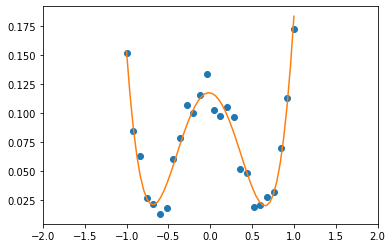

In [16]:
# for order 4 Legenedre Polynomial

showfit_legendre(x,y,coeffs_legendre)

In [17]:
# for order 6 Legenedre Polynomial

coeffs_legendre1 = legendre_fit(x,y,6)

# coeffs = [ 0.0696578   0.00362402 -0.01208258  0.01142622  0.11049235]

Iteration: 7 	 x = [ 0.07003197  0.00430169 -0.01016671  0.01308374  0.11411855 -0.00672697
 -0.01238456] 	 residual = 0.0000


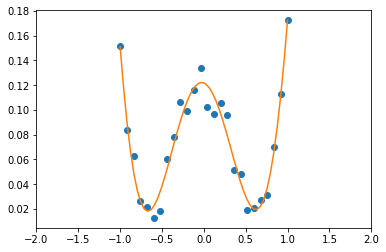

In [18]:
# for order 6 Legenedre Polynomial

showfit_legendre(x,y,coeffs_legendre1)

# Question 4

In [41]:
import sympy as sp

In [42]:
GaussTable = [[[0.861136311, 0.339981043, -0.339981043, -0.861136311], [0.347854845, 0.652145154, 0.652145154, 0.347854845]],
              [[0.906179845, 0.538469310, 0, -0.538469310, -0.906179845], [0.236926885, 0.478628670, 0.56888889, 0.478628670, 0.236926885]],
              [[0.932469514, 0.661209386, 0.238619186, -0.238619186, -0.661209386, -0.932469514], [0.171324492, 0.360761573, 0.467913934, 0.467913934, 0.360761573,  0.171324492]]]
display(pd.DataFrame(GaussTable, columns=["Integration Points", "Corresponding Weights"]))


,Integration Points,Corresponding Weights
0,"[0.861136311, 0.339981043, -0.339981043, -0.86...","[0.347854845, 0.652145154, 0.652145154, 0.3478..."
1,"[0.906179845, 0.53846931, 0, -0.53846931, -0.9...","[0.236926885, 0.47862867, 0.56888889, 0.478628..."
2,"[0.932469514, 0.661209386, 0.238619186, -0.238...","[0.171324492, 0.360761573, 0.467913934, 0.4679..."


In [43]:
def IG(f, n):
  n = int(n)
  return sum([GaussTable[n - 4][1][i]*f(GaussTable[n - 4][0][i]) for i in range(n)])
def f(x): 
    return 1/np.power((1 + x**2),0.5)
#Iexact, error = integrate.quad(f, -1, 1)
#print("Iexact: ",Iexact)
table = [[i + 4, round(sp.N(IG(f, i + 4)),9)] for i in range(3)]             #truncating to 1e-9, 9 decimal places
table = pd.DataFrame(table, columns=["Number of Integration Points",  "Numerical Integration Results"])
display(table)


,Number of Integration Points,Numerical Integration Results
0,4,1.762054179
1,5,1.762855296
2,6,1.762730048


In [44]:
res = table["Numerical Integration Results"]

In [45]:
table1 = [[res[i],(res[i]-res[0])/res[0],(res[i]-res[1])/res[1],(res[i]-res[2])/res[2]] for i in range(3)]
table1 = pd.DataFrame(table1,columns=["Numerical Integration Results","rel_err wrt 4pt", "rel_err wrt 5pt", "rel_err wrt 6pt"])
display(table1)

,Numerical Integration Results,rel_err wrt 4pt,rel_err wrt 5pt,rel_err wrt 6pt
0,1.762054179,0,-0.0004544428582,-0.0003834217272
1,1.762855296,0.0004546494704,0,7.105342070e-5
2,1.762730048,0.0003835687959,-7.104837247e-5,0
